In [1]:
from xenonnt_plot_style import XENONPlotStyle as xps
xps.use('xenonnt')

In [2]:
from functools import partial
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

from utils import k0, beta, te_denominator, te_right, tm_denominator, tm_right

## 1

In [3]:
lam = 1.33
nf = 1.5
ns = 1.48
nc = 1.0
h = 2

### 1.a

In [4]:
theta = np.arcsin((nf ** 2 - ns ** 2) ** 0.5)
theta, theta * 180 / np.pi, 2 * theta * 180 / np.pi

(np.float64(0.2466235927360044),
 np.float64(14.130490992126319),
 np.float64(28.260981984252638))

### 1.b

In [5]:
k0(lam) * ns, k0(lam) * nf

(6.991815229041945, 7.086299218623593)

### 1.c

In [6]:
max_kf = beta(k0(lam) * ns, lam, nf)
max_kf * h / np.pi

0.7342289092170657

### 1.d

In [7]:
def plot(lam, nf, ns, nc, h, te=True):
    max_kf = beta(k0(lam) * ns, lam, nf)
    if te:
        denominator = te_denominator
        right = te_right
    else:
        denominator = tm_denominator
        right = tm_right
    result = optimize.root_scalar(
        partial(denominator, lam=lam, nf=nf, ns=ns, nc=nc),
        bracket=[1e-6, max_kf],
        method="brentq",
    )
    assert result.converged

    n = np.ceil(max_kf * h / np.pi).astype(int)
    roots = np.pi / 2 * (2 * np.arange(n) + 1) / h
    kf = np.linspace(0, max_kf, 10001)
    kf = kf[~np.any(np.abs(kf - roots[:, None]) < 1e-3, axis=0)]
    roots = np.sort(np.append(roots, result.root))
    kf = np.sort(np.append(kf, roots))
    kf = kf[kf < max_kf]
    is_root = np.isin(kf, roots)

    fig, ax = plt.subplots(1, 1, figsize=(4, 3))

    ax.plot(kf, np.where(is_root, np.nan, np.tan(h * kf)))
    ax.plot(kf, np.where(is_root, np.nan, right(kf, lam, nf, ns, nc)))
    ax.axhline(0, linestyle='dashed', color=xps.colors['grey'])

    ax.set_xlim(kf[0], kf[-1])
    ax.set_ylim(-10, 10)

    ax.set_xlabel('$\kappa$')

    plt.show()
    
    for i in range(len(roots) - 1):
        max_kf = beta(k0(lam) * ns, lam, nf)
        result = optimize.root_scalar(
            lambda kf: np.tan(h * kf) - right(kf, lam, nf, ns, nc),
            bracket=[roots[i] + 1e-6, roots[i + 1] - 1e-6],
            method="brentq",
        )
        assert result.converged
        print(result.root)

/home/dachengx/fundamentals_of_photonics/utils.py:23: RuntimeWarning: divide by zero encountered in divide
  return kf * (1 - gamma_s * gamma_c / kf ** 2)
/home/dachengx/fundamentals_of_photonics/utils.py:23: RuntimeWarning: invalid value encountered in multiply
  return kf * (1 - gamma_s * gamma_c / kf ** 2)


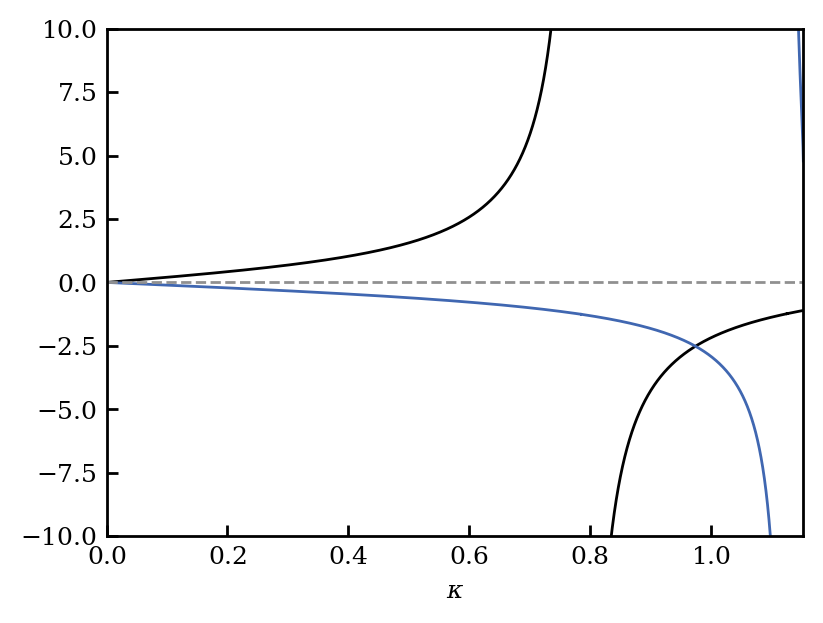

0.9746465132742879


In [8]:
plot(lam, nf, ns, nc, h)

## 2

In [9]:
lam = 1.0
nf = 1.5
ns = 1.48
h = 8.0

In [10]:
max_kf = beta(k0(lam) * ns, lam, nf)
max_kf * h / np.pi

3.9060977970347746

### 2.a

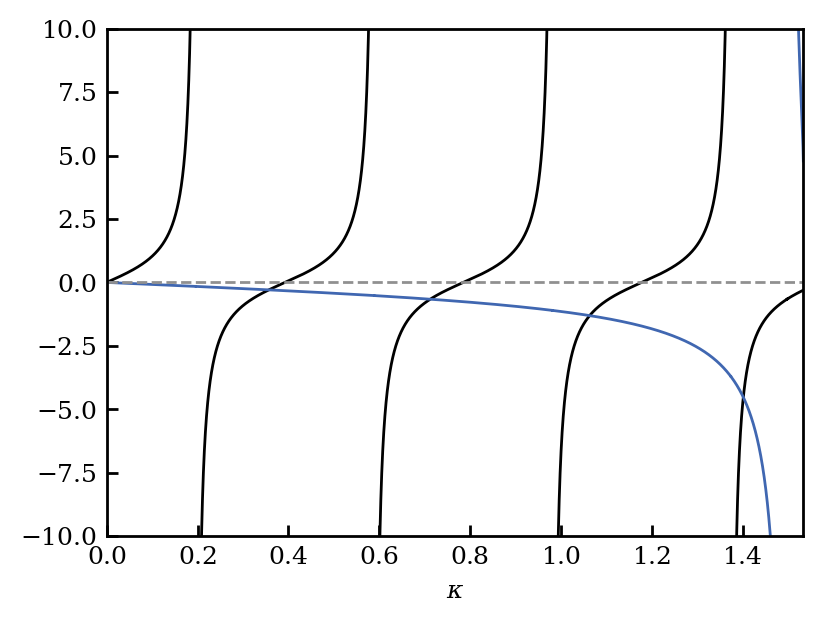

0.35698411469781216
0.7123332242910104
1.0633578822582963
1.401632144879575


In [11]:
plot(lam, nf, ns, 1.0, h)

### 2.b

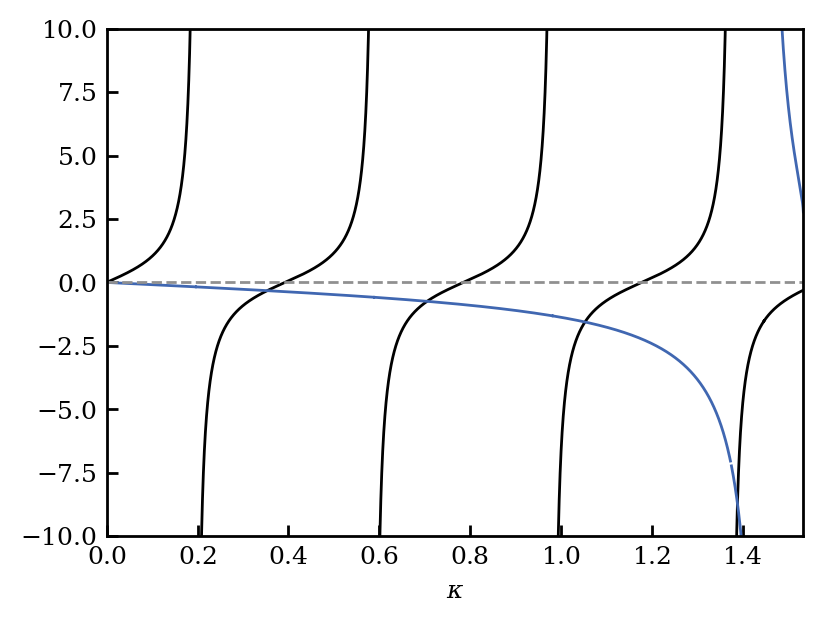

0.35348256017185203
0.705351491162457
1.0530123226934438
1.3887326491956316


In [12]:
plot(lam, nf, ns, 1.33, h)

### 2.c

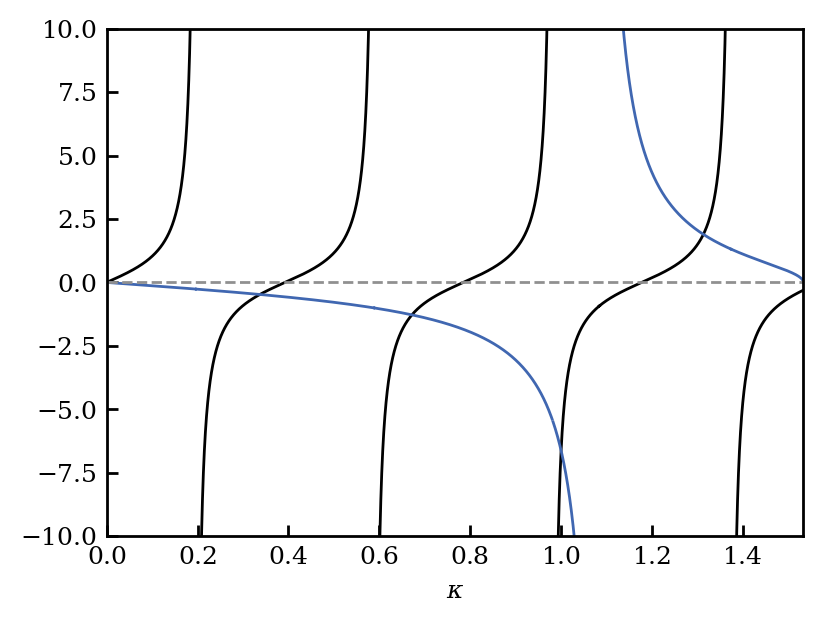

0.33727655156175274
0.6720246623693008
1.0004670752516382
1.3137125055138703


In [13]:
plot(lam, nf, ns, 1.48, h)

### 2.e

In [14]:
max_kf = beta(k0(lam) * ns, lam, nf)
n = 10
n * np.pi / max_kf

20.480798012976067

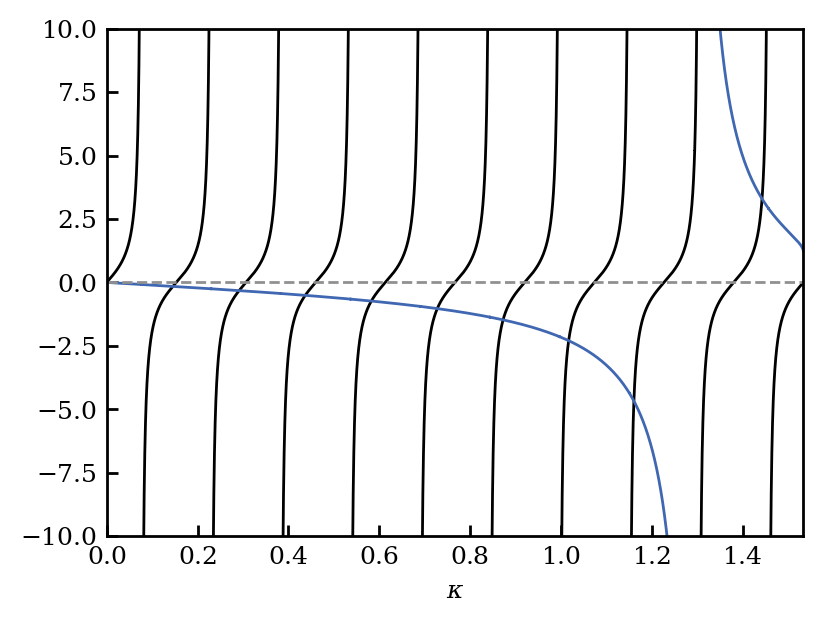

0.14579262754664968
0.291534294206775
0.4371703873463196
0.5826381567516467
0.7278601395739944
0.8727329990686553
1.01710575135966
1.1607297330290476
1.3031125135734178
1.4428422402948706


In [15]:
plot(lam, nf, ns, 1.45, n * np.pi / max_kf)

## 3

In [16]:
lam = 1.0
nf = 1.5
ns = 1.48
h = 8.0

In [17]:
max_kf = beta(k0(lam) * ns, lam, nf)
max_kf * h / np.pi

3.9060977970347746

### 3.a

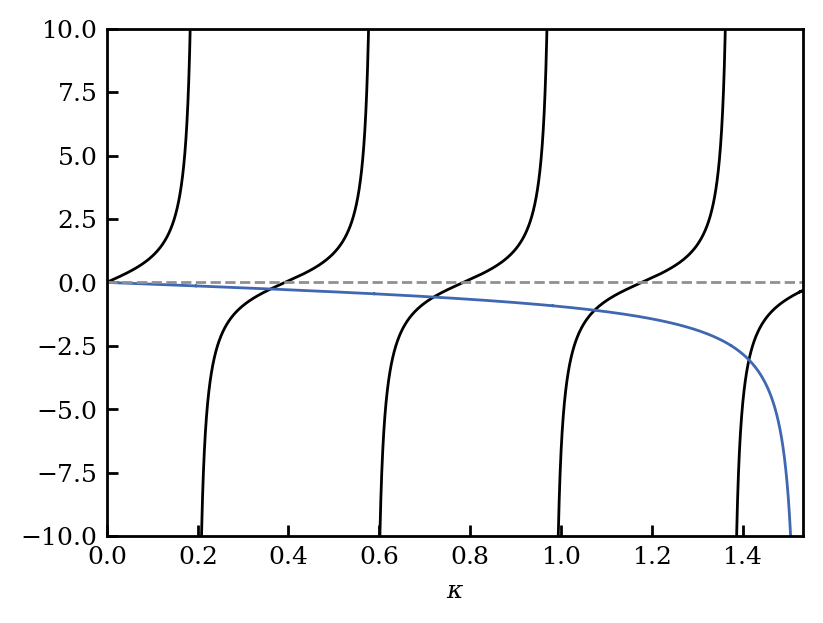

0.3609106946943923
0.7199853822953883
1.0742130674172108
1.414022937551783


In [18]:
plot(lam, nf, ns, 1.0, h, te=False)

### 3.b

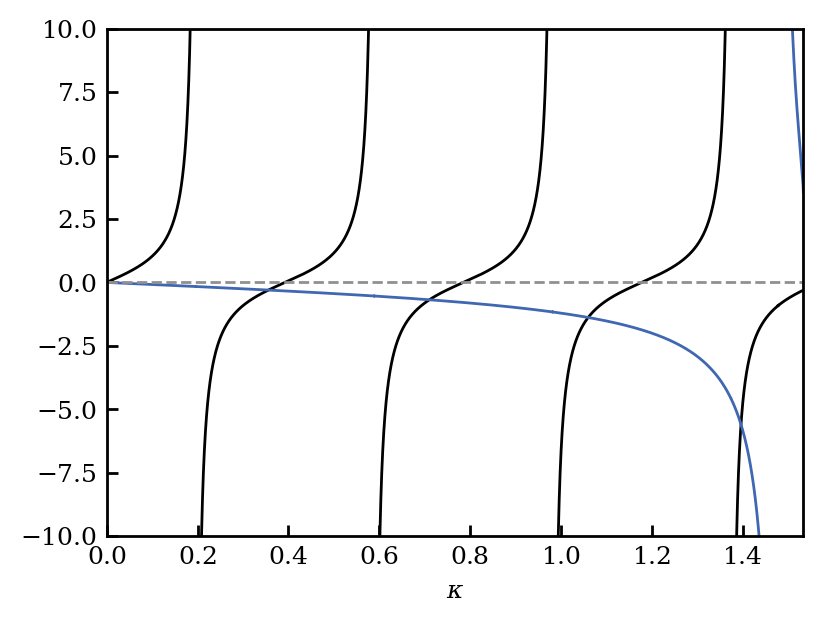

0.3561147039873715
0.7104262056468925
1.0600670148207856
1.3965371893451215


In [19]:
plot(lam, nf, ns, 1.33, h, te=False)

### 3.c

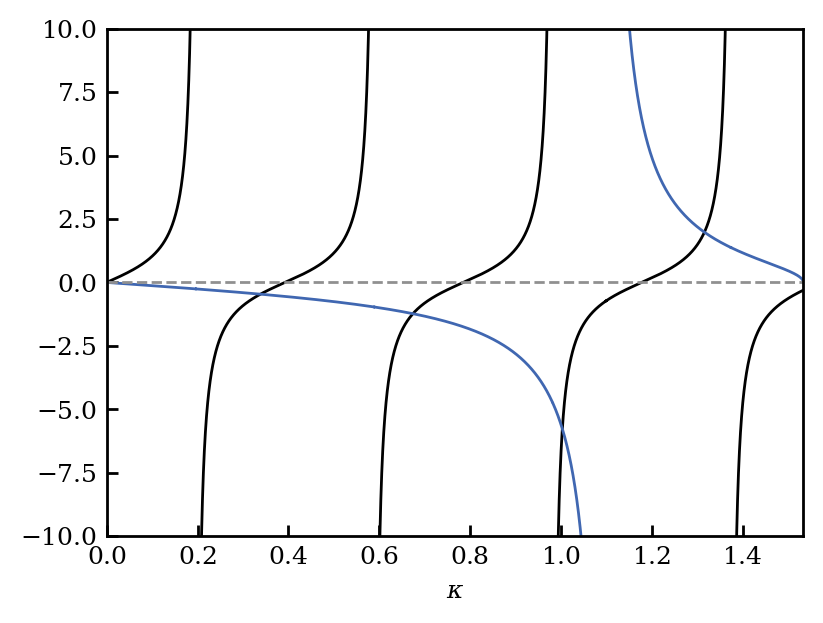

0.3384993960636342
0.6742491197349686
1.003193883280017
1.315973808864497


In [20]:
plot(lam, nf, ns, 1.48, h, te=False)

### 3.e

In [21]:
max_kf = beta(k0(lam) * ns, lam, nf)
n = 10
n * np.pi / max_kf

20.480798012976067

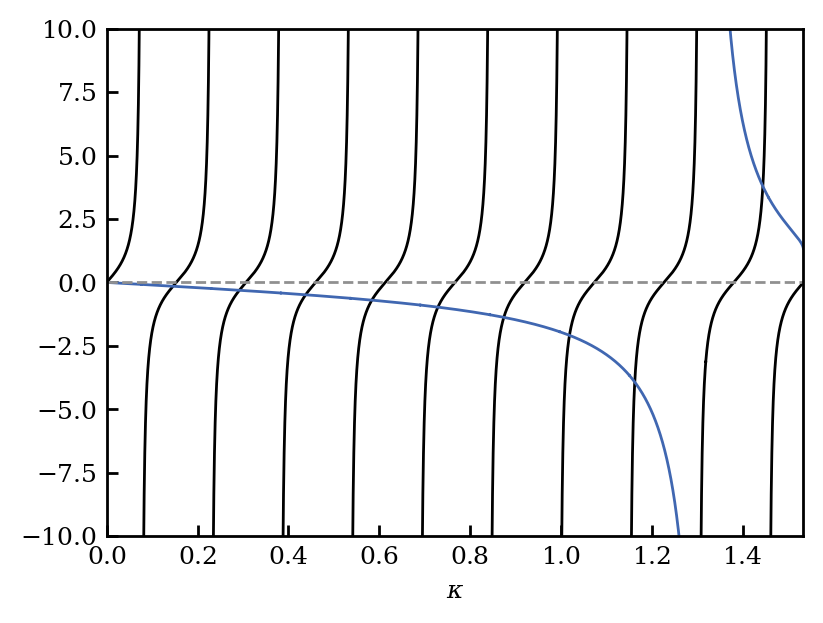

0.1460930546253588
0.2921298839701667
0.4380503876740109
0.583785841381964
0.729251960290319
0.8743371639545714
1.0188797426183918
1.1626154638649513
1.305024543332922
1.4446204474122666


In [22]:
plot(lam, nf, ns, 1.45, n * np.pi / max_kf, te=False)